In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
df = pd.read_csv("comprar_arrendar.csv")
df.head()

,ingresos,gastos_comunes,pago_coche,gastos_otros,ahorros,vivienda,estado_civil,hijos,trabajo,comprar
0,6000,1000,0,600,50000,400000,0,2,2,1
1,6745,944,123,429,43240,636897,1,3,6,0
2,6455,1033,98,795,57463,321779,2,1,8,1
3,7098,1278,15,254,54506,660933,0,0,3,0
4,6167,863,223,520,41512,348932,0,0,3,1


## Valores nulos

In [32]:
for feature in df.columns:
    print("Total valores nulos de ", feature, " :", df[feature].isna().sum())

Total valores nulos de  ingresos  : 0
Total valores nulos de  gastos_comunes  : 0
Total valores nulos de  pago_coche  : 0
Total valores nulos de  gastos_otros  : 0
Total valores nulos de  ahorros  : 0
Total valores nulos de  vivienda  : 0
Total valores nulos de  estado_civil  : 0
Total valores nulos de  hijos  : 0
Total valores nulos de  trabajo  : 0
Total valores nulos de  comprar  : 0
Total valores nulos de  cant_conyuges  : 0
Total valores nulos de  grupo_familiar  : 0
Total valores nulos de  ingreso_promedio  : 0


## Tipos de datos

In [33]:
df.describe()

,ingresos,gastos_comunes,pago_coche,gastos_otros,ahorros,vivienda,estado_civil,hijos,trabajo,comprar,cant_conyuges,grupo_familiar,ingreso_promedio
count,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000
mean,4958.995050,971.584158,211.742574,515.425743,38749.668317,373349.638614,1.024752,1.232673,4.490099,0.331683,1.301980,2.534653,2936.618812
std,1682.862556,272.106351,124.940754,168.103075,17365.231870,136371.525622,0.837184,1.367833,2.535794,0.471988,0.460257,1.596416,2078.115133
min,2008.000000,384.000000,0.000000,201.000000,10319.000000,176553.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,496.000000
25%,3513.750000,766.750000,99.000000,383.250000,24964.250000,274810.000000,0.000000,0.000000,2.000000,0.000000,1.000000,1.000000,1230.500000
50%,4947.500000,968.000000,208.500000,522.500000,38523.000000,340783.500000,1.000000,1.000000,5.000000,0.000000,1.000000,2.000000,2175.500000
75%,6374.500000,1165.250000,318.750000,656.750000,52150.750000,444482.000000,2.000000,2.000000,7.000000,1.000000,2.000000,4.000000,4236.750000
max,7984.000000,1585.000000,448.000000,828.000000,69934.000000,669540.000000,2.000000,4.000000,8.000000,1.000000,2.000000,6.000000,7939.000000


In [34]:
df.dtypes

ingresos              int64
gastos_comunes        int64
pago_coche            int64
gastos_otros          int64
ahorros               int64
vivienda              int64
estado_civil          int64
hijos                 int64
trabajo               int64
comprar               int64
cant_conyuges         int64
grupo_familiar        int64
ingreso_promedio    float64
dtype: object

## Valores tipo object
No hay valores tipo object

## Graficos

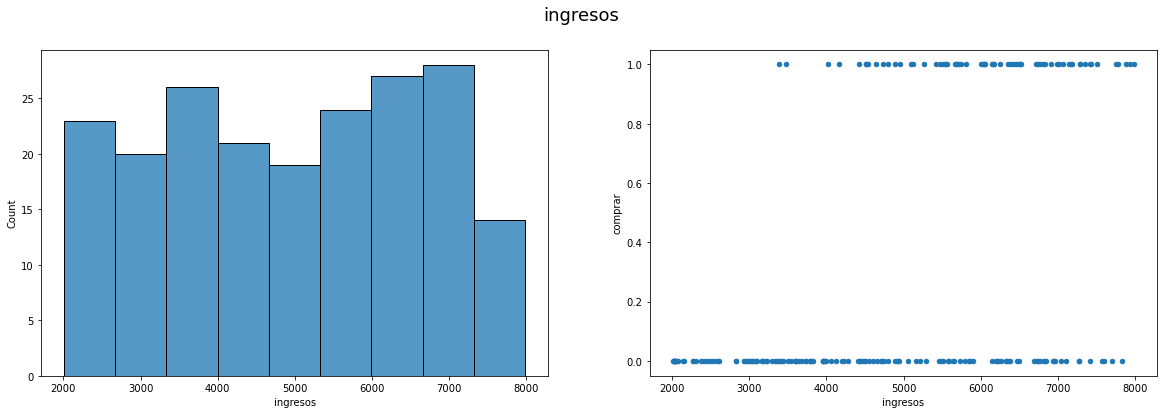

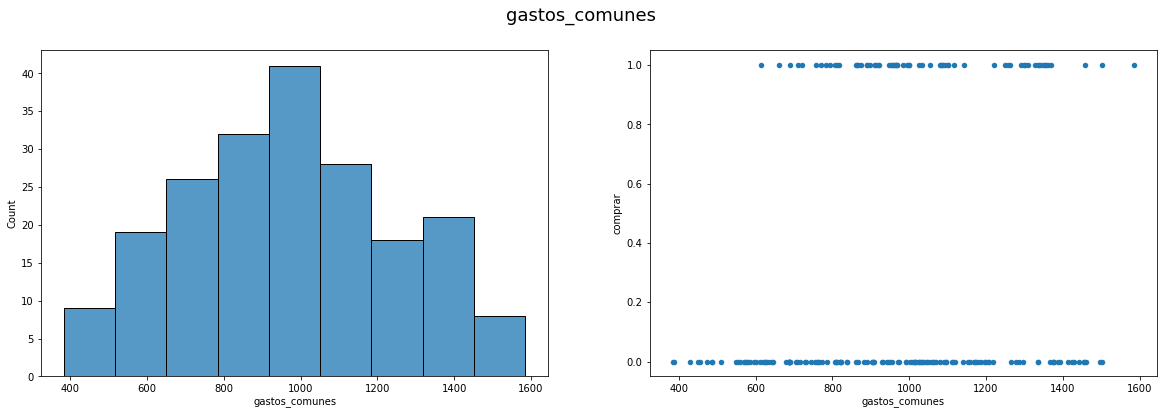

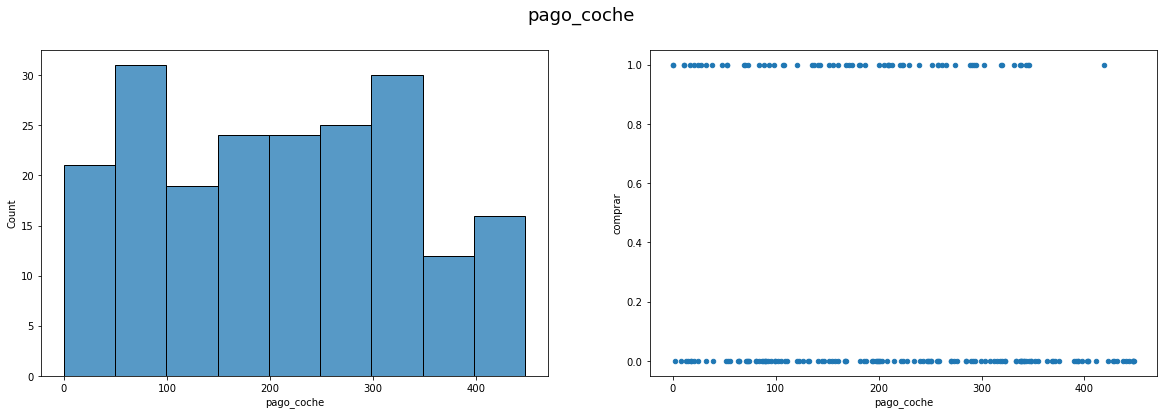

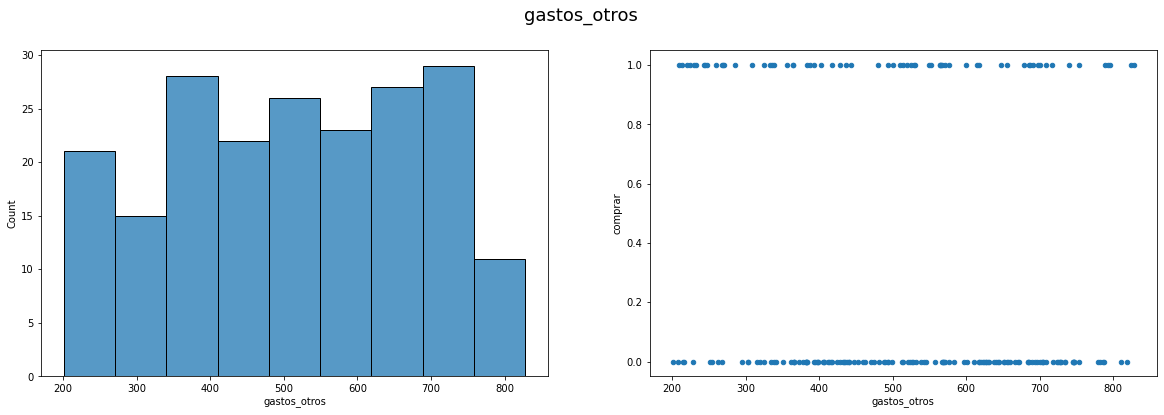

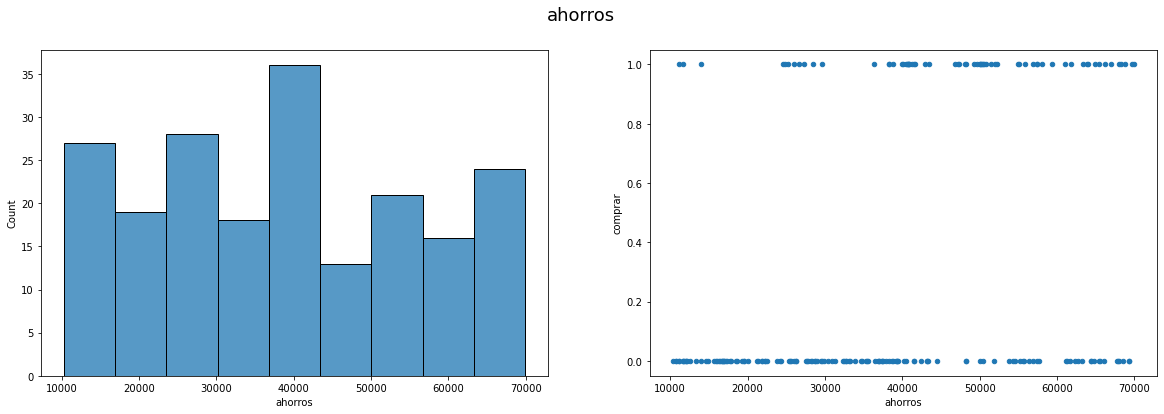

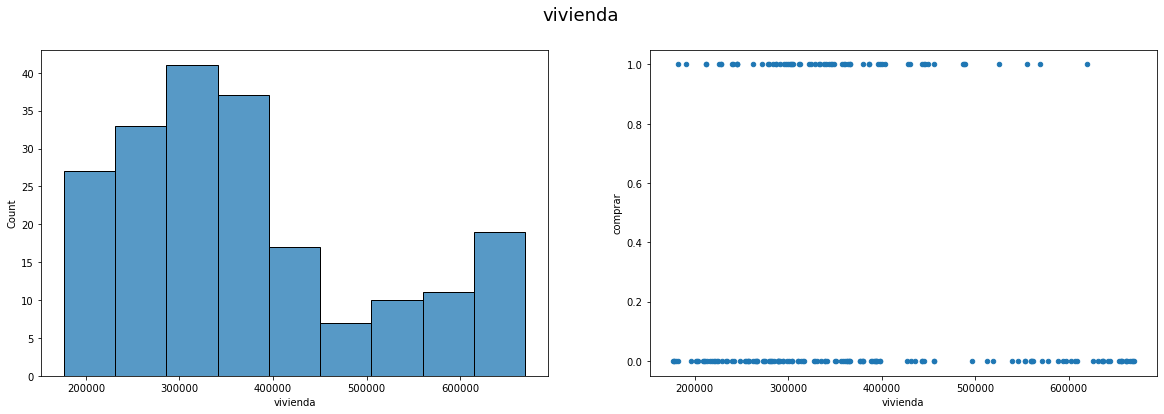

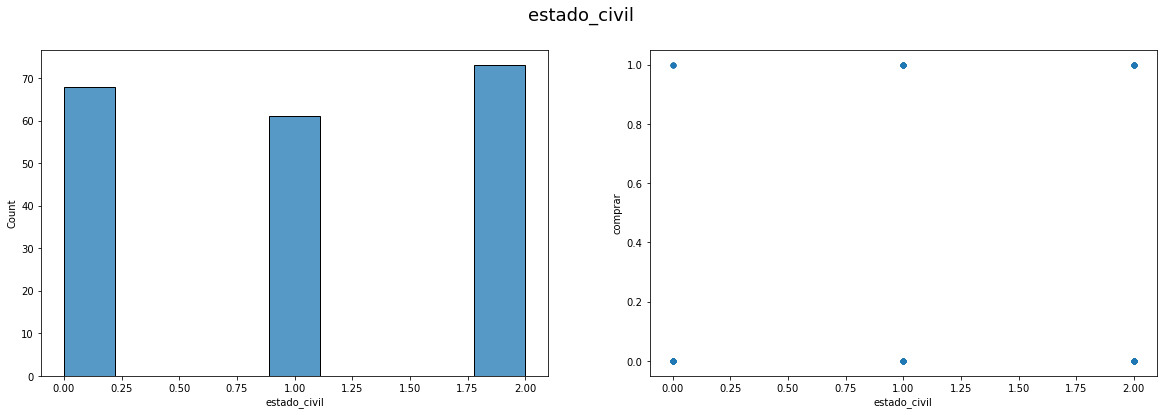

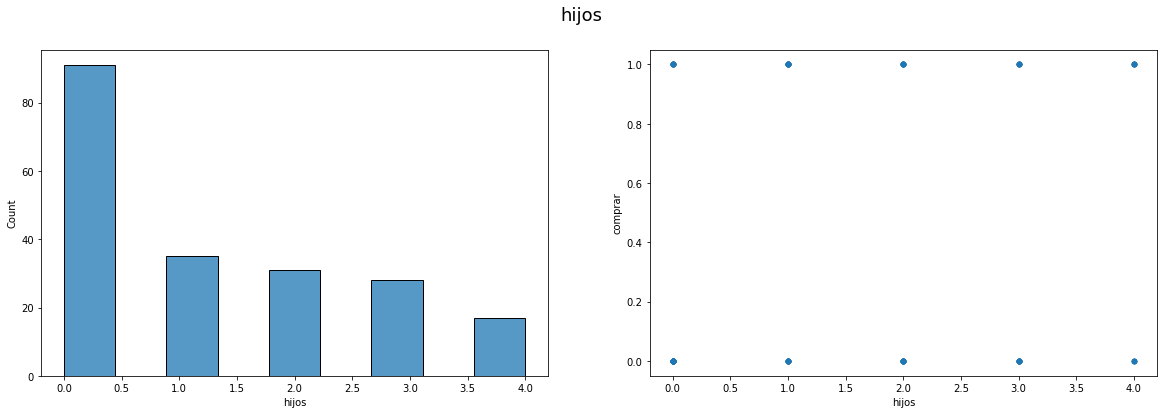

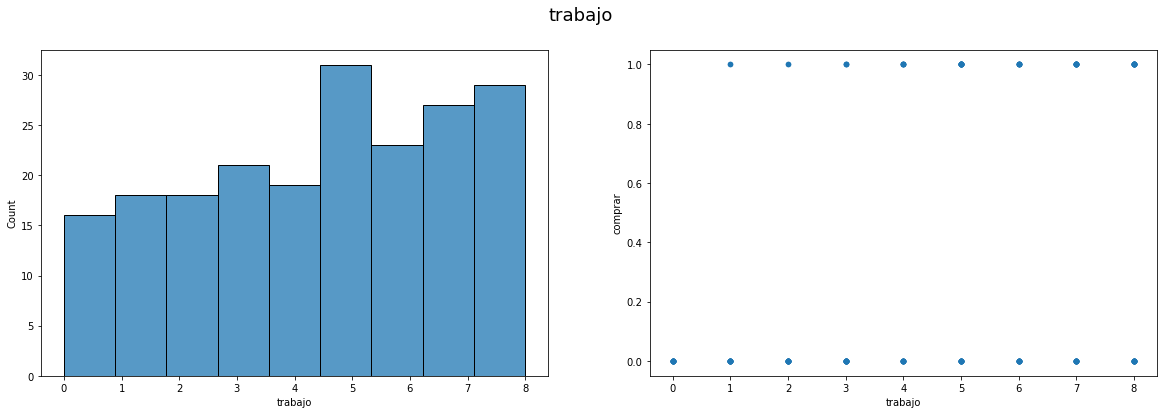

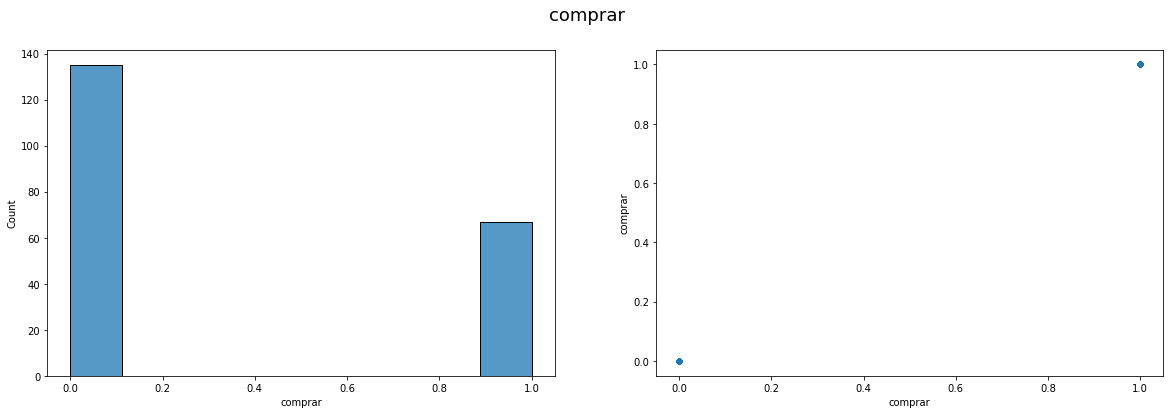

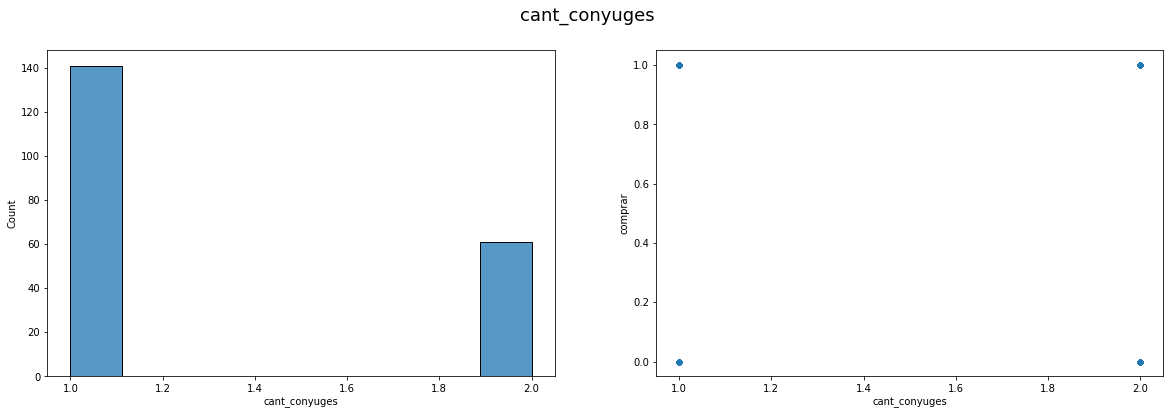

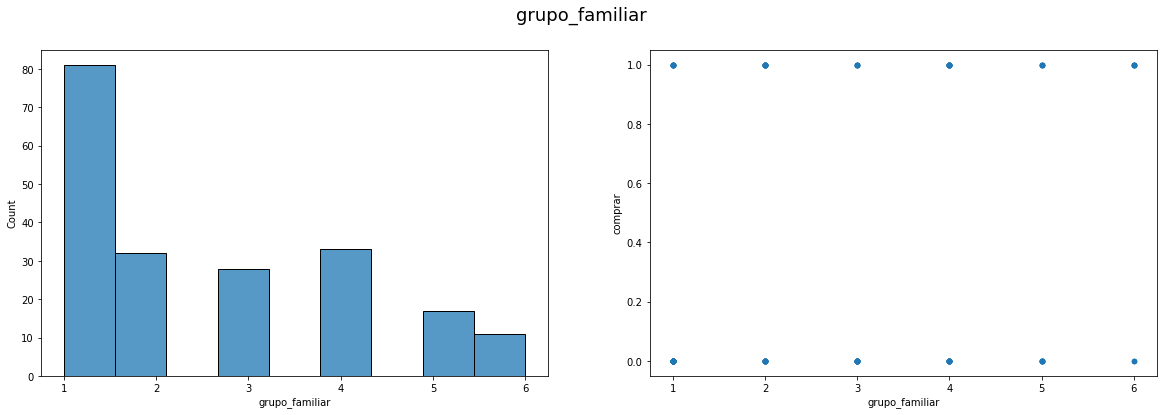

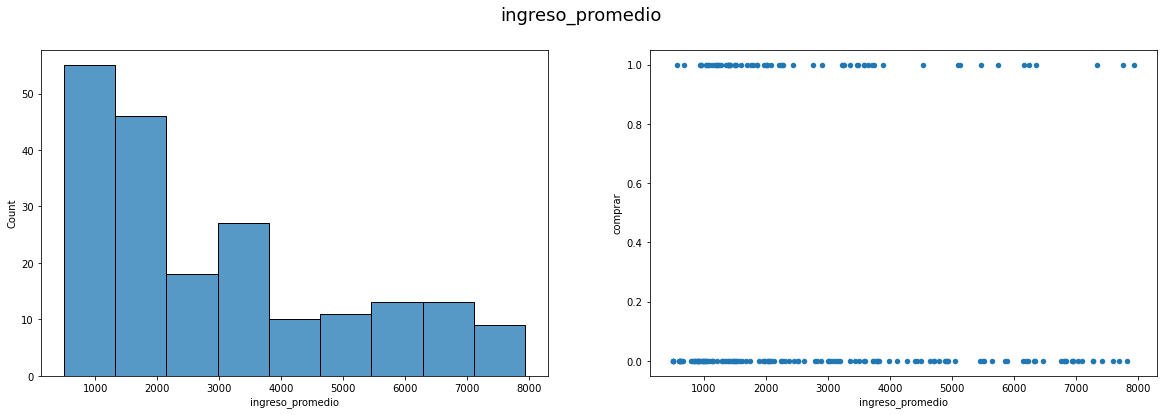

In [35]:
for col in df.columns:
    fig, ax = plt.subplots(1, 2, figsize=(20, 6))
    fig.suptitle(col, fontsize=18)
    sns.histplot(df[col], ax=ax[0], kde=False)
    df[[col] + ['comprar']].plot.scatter(x=col, y='comprar', ax=ax[1])

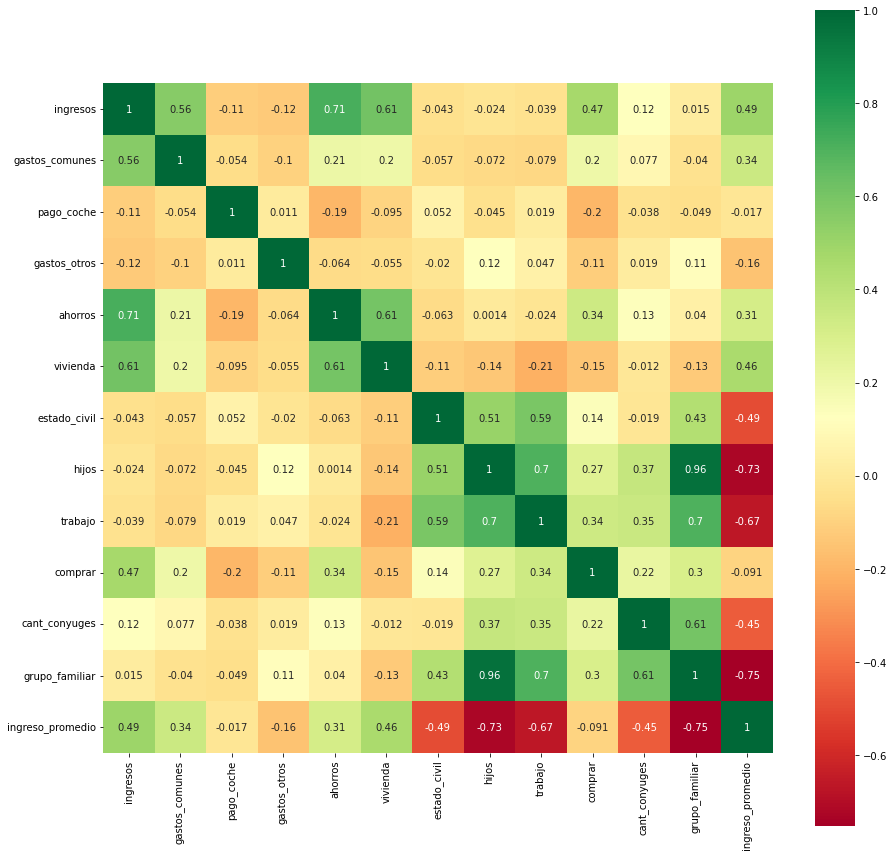

In [36]:
plt.figure(figsize=(15,15))
p = sns.heatmap(df.corr(), annot=True, cmap='RdYlGn',square=True)

## Crear nueva tabla *Ingreso Promedio*

Crearemos una tabla llamada "Ingreso_promedio", la cual su valor sera el siguiente:

$IngresoPromedio = ingresos \ / \ (cantConyuges + hijos)$

In [3]:
df["cant_conyuges"] = df["estado_civil"].apply(lambda x: 2 if x == 1 else 1)

In [4]:
df["grupo_familiar"] = df["cant_conyuges"] + df["hijos"]

In [5]:
df["ingreso_promedio"] = round(df["ingresos"] / df["grupo_familiar"])

In [6]:
df.head()

,ingresos,gastos_comunes,pago_coche,gastos_otros,ahorros,vivienda,estado_civil,hijos,trabajo,comprar,cant_conyuges,grupo_familiar,ingreso_promedio
0,6000,1000,0,600,50000,400000,0,2,2,1,1,3,2000.0
1,6745,944,123,429,43240,636897,1,3,6,0,2,5,1349.0
2,6455,1033,98,795,57463,321779,2,1,8,1,1,2,3228.0
3,7098,1278,15,254,54506,660933,0,0,3,0,1,1,7098.0
4,6167,863,223,520,41512,348932,0,0,3,1,1,1,6167.0


<AxesSubplot:>

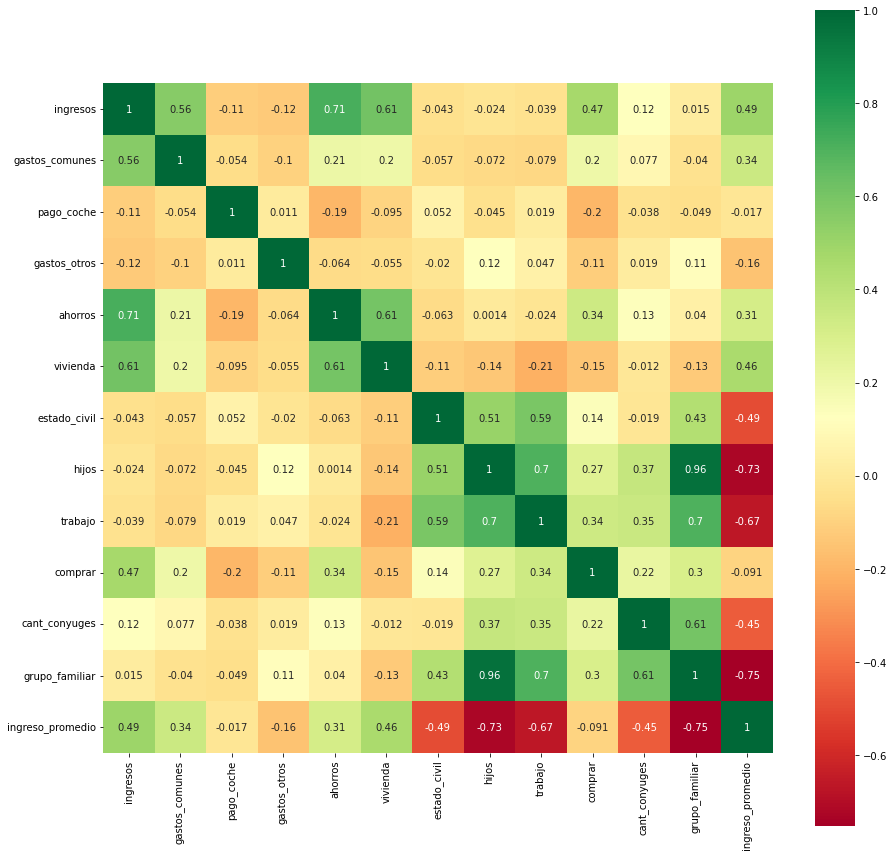

In [7]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(), annot=True, cmap='RdYlGn',square=True)

## Entrenando el modelo

## Arboles de decisiones

In [38]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X = df[['ingresos', 'gastos_comunes', 'ahorros', 'vivienda', 'estado_civil', 
        'hijos', 'trabajo', 'ingreso_promedio']]
y = df['comprar']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
modelo = DecisionTreeClassifier()
modelo.fit(X_train, y_train)
Y_pred = modelo.predict(X_test)
print('Accuracy del modelo:', accuracy_score(y_test, Y_pred))

Accuracy del modelo: 0.926829268292683


## Matriz de confusión

In [39]:
from sklearn.metrics import confusion_matrix
matriz = confusion_matrix(y_test, Y_pred)
print('Matriz de Confusión:')
print(matriz)

Matriz de Confusión:
[[24  3]
 [ 0 14]]


# Tree

Profundidad del árbol: 8
Número de nodos terminales: 21


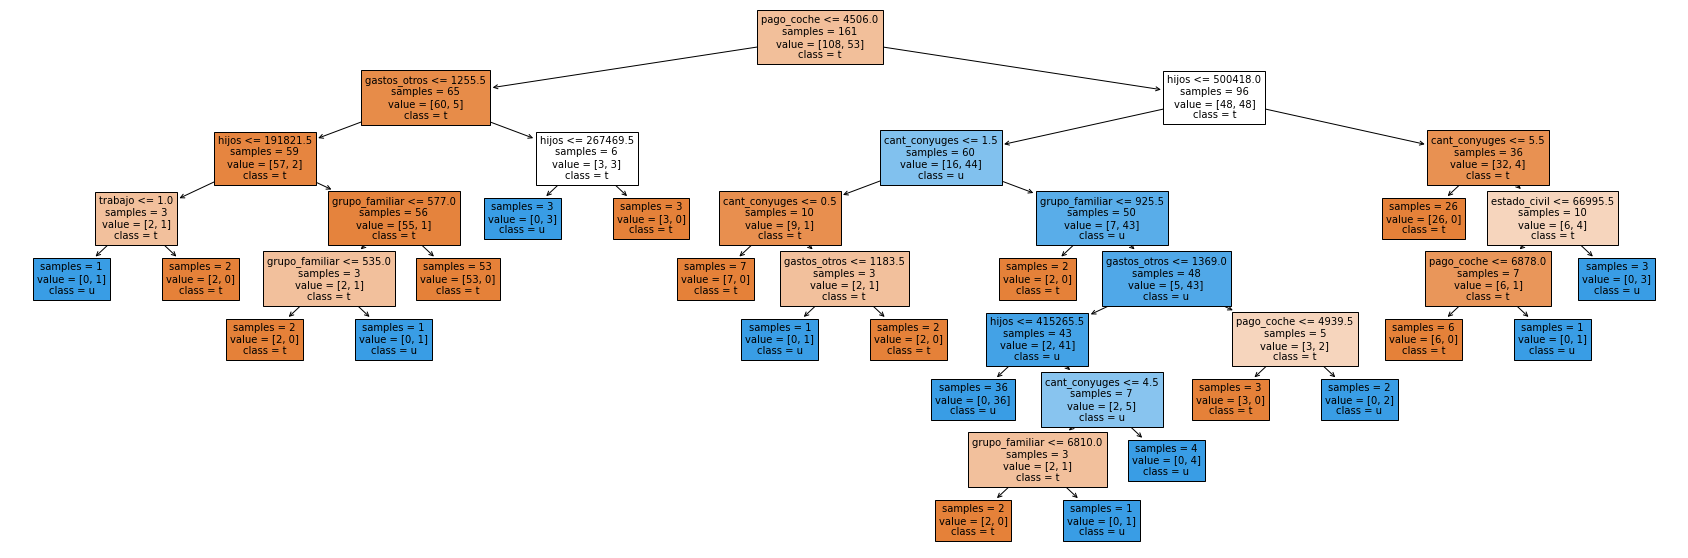

In [40]:
from sklearn.tree import plot_tree
fig, ax = plt.subplots(figsize=(30, 10))

print(f"Profundidad del árbol: {modelo.get_depth()}")
print(f"Número de nodos terminales: {modelo.get_n_leaves()}")

plot = plot_tree(
            decision_tree = modelo,
            feature_names = df.drop(columns = ['ingresos', 'gastos_comunes', 'ahorros', 'vivienda','ingreso_promedio']).columns,
            class_names   = 'turbine_capacity',
            filled        = True,
            impurity      = False,
            fontsize      = 10,
            precision     = 2,
            ax            = ax
       )

## Naive bayes

In [49]:
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import train_test_split
"""
X = df[['ingresos', 'gastos_comunes', 'ahorros', 'vivienda', 'estado_civil', 
        'hijos', 'trabajo', 'ingreso_promedio']]
y = df['comprar']
"""
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
modelo = GaussianNB()
modelo.fit(X_train, y_train)
y_pred = modelo.predict(X_test)

precision = precision_score(y_test, y_pred)
print('Precisión del modelo:', precision)

Precisión del modelo: 0.9


In [50]:
from sklearn.metrics import confusion_matrix

matriz = confusion_matrix(y_test, y_pred)
print('Matriz de Confusión:')
print(matriz)

# Se calcula la precisión del modelo
from sklearn.metrics import precision_score

precision = precision_score(y_test, y_pred)
print('Precisión del modelo:', precision)

Matriz de Confusión:
[[27  1]
 [ 4  9]]
Precisión del modelo: 0.9


In [52]:
from sklearn.metrics import accuracy_score, f1_score, recall_score

accuracy = accuracy_score(y_test, y_pred)
print('Accurancy del modelo:',accuracy)

print('F1 score del modelo:',f1_score(y_test, y_pred))
print('Recall del modelo:',recall_score(y_test, y_pred))

Accurancy del modelo: 0.8780487804878049
F1 score del modelo: 0.7826086956521738
Recall del modelo: 0.6923076923076923


## Dejando que se seleccionen las mejores columnas

In [ ]:
from sklearn.feature_selection import SelectKBest